In [290]:
## Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [291]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Feature Engineering



In [965]:
def one_hot_encode(df, cat_vars=None, num_vars=None):
    cat_df = pd.get_dummies(df[cat_vars])
    num_df = df[num_vars].apply(pd.to_numeric)
    return pd.concat([cat_df, num_df], axis=1)

In [966]:
# Features picked from correlation matrix
categorical_vars=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']


numeric_vars=[ 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold','SalePrice']


numeric_vars_test = [ 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [967]:
train_feature = one_hot_encode(df_train, cat_vars=categorical_vars, num_vars=numeric_vars)
test_feature = one_hot_encode(df_test, cat_vars=categorical_vars, num_vars=numeric_vars_test)

In [968]:
all_data_na = (df_train.isnull().sum() / len(df_train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [969]:
train_feature.columns

Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave',
       'LotShape_IR1',
       ...
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object', length=286)

## Results from EDA


#### Numerical

    From plotting: 
    
    
    
    From correlation:
    [ 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold','SalePrice']
    
    From statistical analysis
    
    
    
#### Categorical


    From plotting: 
    
    
    
    From correlation:
    
    ['BsmtQual_Ex', 'KitchenQual_Ex', 'Foundation_PConc',
       'ExterQual_Gd', 'ExterQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'GarageFinish_Fin', 'Neighborhood_NridgHt', 'SaleType_New',
       'SaleCondition_Partial', 'FireplaceQu_Gd', 'GarageType_Attchd',
       'MasVnrType_Stone']
    
    From statistical analysis
    
#### Multicolinearity
    1. TotRmsAbvGrd(x) vs GrLivArea vs 2ndFlrSF(x)
    2. GarageCars vs GarageAreas(x)
    3. 1stFlrSF vs TotalBsmtSF (x)
    
    
    4.ExterQual_Gd vs ExterQual_Ex (x)



### New features 

In [997]:
## Combine total areas 

train_feature['TotalSF'] = train_feature['TotalBsmtSF'] + train_feature['1stFlrSF'] + train_feature['2ndFlrSF']
test_feature['TotalSF'] = test_feature['TotalBsmtSF'] + test_feature['1stFlrSF'] + test_feature['2ndFlrSF']


In [ ]:
train_feature['ExtraFeature'] = train_feature['GrLivArea'] + train_feature['1stFlrSF'] + train_feature['2ndFlrSF']
test_feature['ExtraFeature'] = test_feature['GrLivArea'] + test_feature['1stFlrSF'] + test_feature['2ndFlrSF']

In [998]:
selected_var_feature = ['OverallQual','TotalSF', 'GrLivArea', 'GarageCars',
       'TotalBsmtSF',  'FullBath', 'YearBuilt',
       'YearRemodAdd', 'Fireplaces', 'BsmtFinSF1',
        'WoodDeckSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath']


selected_cat_feature = ['BsmtQual_Ex', 'KitchenQual_Ex', 'Foundation_PConc',
       'ExterQual_Gd', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'GarageFinish_Fin', 'Neighborhood_NridgHt', 'SaleType_New',
       'SaleCondition_Partial', 'FireplaceQu_Gd', 'GarageType_Attchd',
       'MasVnrType_Stone', 'Neighborhood_NoRidge', 'KitchenQual_Gd',
       'BsmtExposure_Gd', 'Exterior2nd_VinylSd', 'Exterior1st_VinylSd',
       'GarageCond_TA', 'FireplaceQu_Ex', 'CentralAir_Y', 'GarageQual_TA',
       'MSZoning_RL', 'HouseStyle_2Story', 'RoofStyle_Hip',
       'GarageType_BuiltIn', 'BsmtQual_Gd', 'Electrical_SBrkr']


selected_total_feature =selected_var_feature + selected_cat_feature

## Cleaning data

In [999]:
null_columns=test_feature.columns[test_feature.isnull().any()]


In [1000]:
test_feature[null_columns].isnull().sum()

BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
GarageCars      1
GarageArea      1
TotalSF         1
dtype: int64

In [1001]:
test_feature[test_feature["BsmtFullBath"].isnull()][null_columns]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea,TotalSF
660,NaN,NaN,NaN,NaN,NaN,NaN,1.0,280.0,NaN
728,0.0,0.0,0.0,0.0,NaN,NaN,2.0,624.0,3820.0


In [1002]:
test_new_df = test_feature[selected_total_feature]

# replace null value with mean of each columns 
test_new_df.fillna(0,inplace=True)

/Users/ngjo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


## Remove outliers

In [1003]:
def remove_outliers(df,col,k): 
    top_value = np.log(df.nlargest(k, [col])[col].values).min()
    df =  df[(np.log(df[col])<top_value)]
    return df
def theshold(df,col1,k1,col2,k2):
    df =  df[(df[col1]<k1)&(df[col2]<k2)]
    return df

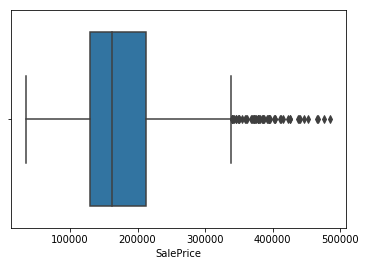

In [1004]:
sns.boxplot(train_feature['SalePrice'])

In [1005]:
# Let remove the top 2 points
train_feature= remove_outliers(train_feature,'SalePrice',5)


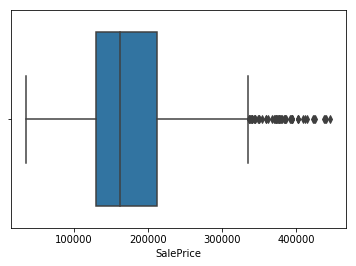

In [1006]:
sns.boxplot(train_feature['SalePrice'])

Text(0.5, 1.0, 'Relationship with grlivarea')

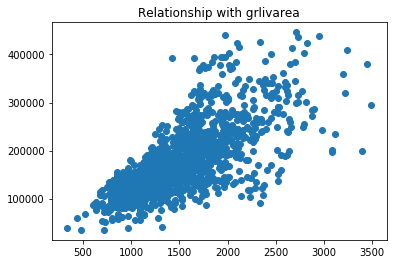

In [1007]:
plt.figure()
plt.scatter(train_feature['GrLivArea'],train_feature['SalePrice'])
plt.title('Relationship with grlivarea')

In [1008]:
train_feature  = remove_outliers(train_feature,'GrLivArea',2)

Text(0.5, 1.0, 'Relationship with grlivarea')

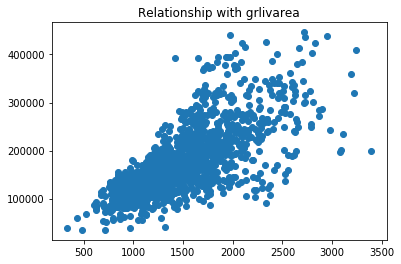

In [1009]:
plt.figure()
plt.scatter(train_feature['GrLivArea'],train_feature['SalePrice'])
plt.title('Relationship with grlivarea')

Text(0.5, 1.0, 'Relationship with TotalBsmtSF')

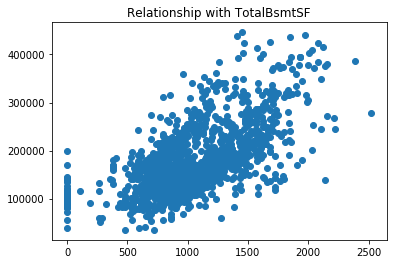

In [1010]:
plt.figure()
plt.scatter(train_feature['TotalBsmtSF'],train_feature['SalePrice'])
plt.title('Relationship with TotalBsmtSF')

In [1011]:
train_feature  = theshold(train_feature,'TotalBsmtSF',3000,'SalePrice',500000)


Text(0.5, 1.0, 'Relationship with TotalBsmtSF')

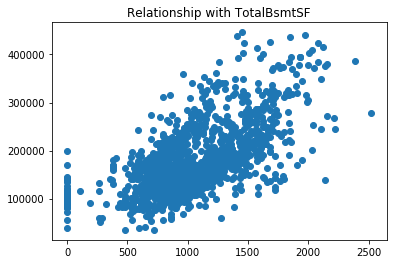

In [1012]:
plt.figure()
plt.scatter(train_feature['TotalBsmtSF'],train_feature['SalePrice'])
plt.title('Relationship with TotalBsmtSF')

Text(0.5, 1.0, 'Relationship with TotalBsmtSF')

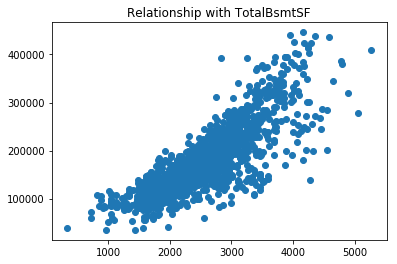

In [1013]:
plt.figure()
plt.scatter(train_feature['TotalSF'],train_feature['SalePrice'])
plt.title('Relationship with TotalBsmtSF')

## Baseline 

In [1014]:

# The following script divides data into attributes and labels:
X = train_feature[selected_total_feature]
y = np.log(train_feature['SalePrice'])
# Split into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)




lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test) 
# Mean square error will be used to define my model performance
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))



Mean Squared Error: 0.014757070836066108


### Feature importance 

In [1015]:
rf = RandomForestRegressor(n_jobs = -1,oob_score=True, random_state=40)
# Fiting data
rf.fit(X_train,y_train)
# Prediction
y_pred = rf.predict(X_test) 

/Users/ngjo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ngjo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


TotalSF         0.564466
OverallQual     0.193498
YearBuilt       0.036519
GrLivArea       0.021418
CentralAir_Y    0.021099
LotArea         0.020237
BsmtUnfSF       0.018053
YearRemodAdd    0.014287
BsmtFinSF1      0.013894
TotalBsmtSF     0.012926
dtype: float64


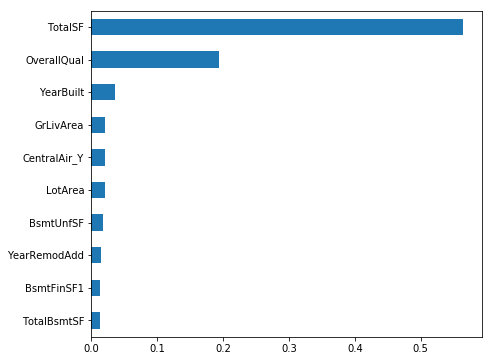

In [1016]:
### Plotting feature importance
k = 10
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances.nlargest(k))
top_features = feature_importances.nlargest(k)
top_features.sort_values(inplace=True)
top_features.plot(kind='barh', figsize=(7,6))

CentralAir_Y         0.021099
KitchenQual_Gd       0.010566
MSZoning_RL          0.005123
GarageQual_TA        0.002274
GarageType_Attchd    0.002128
dtype: float64


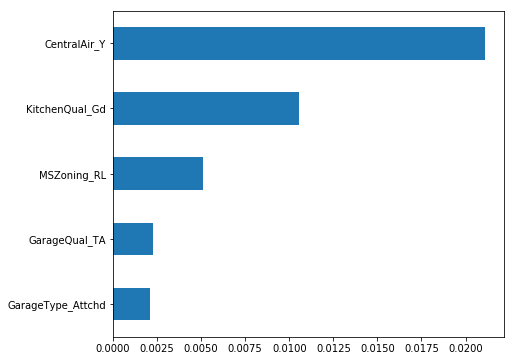

In [1017]:
### Plotting feature importance for categorical variables
k = 5
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances[selected_cat_feature].nlargest(k))
top_features = feature_importances[selected_cat_feature].nlargest(k)
top_features.sort_values(inplace=True)
top_features.plot(kind='barh', figsize=(7,6))

### Grid Search

In [1018]:
#model = RandomForestRegressor()
# Define Parameters
#param_grid = {"max_depth": [3,5,6],
             #"max_features" : [1.0,0.3,0.1],
             #"min_samples_leaf" : [3,5,9,15],
              #"n_estimators": [50,100,300,500,1000]}
# Perform Grid Search CV
#gs_cv = GridSearchCV(model, param_grid=param_grid, cv = 3, verbose=10, n_jobs=-1 ).fit(X_train, y_train)

In [1019]:
#gs_cv.best_estimator_

In [1020]:
# cross validation score and print summary
def train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std):
    neg_mse = cross_val_score(model, feature_df, target_df, cv=5, n_jobs=num_procs, scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)

def print_summary(model, mean_mse, cv_std):
    print('\nModel:\n', model)
    print('Average MSE:\n', mean_mse[model])
    print('Standard deviation during CV:\n', cv_std[model])

### Random forest and gradient boosting

In [1021]:
#initialize model list and dicts
models = []
mean_mse = {}
cv_std = {}
res = {}

#define number of processes to run in parallel
num_procs = 2

In [1022]:
#create models -- hyperparameter tuning already done by hand for each model
lr_cv = LinearRegression()
rf_tuned = RandomForestRegressor(n_estimators=100, n_jobs=num_procs, max_depth=5,random_state=2)
gbm_tuned = GradientBoostingRegressor(n_estimators=1000, max_depth=3,learning_rate = 0.05,max_features = 'sqrt',min_samples_leaf=15,loss='huber',random_state=3)
                      
models.extend([lr_cv, rf_tuned, gbm_tuned])

#parallel cross-validate models, using MSE as evaluation metric, and print summaries
print("Beginning cross validation")
for model in models:
    train_model(model, X, y, num_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)

Beginning cross validation

Model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Average MSE:
 0.017253552593096026
Standard deviation during CV:
 0.0012609200395300453

Model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
           oob_score=False, random_state=2, verbose=0, warm_start=False)
Average MSE:
 0.023630602119449264
Standard deviation during CV:
 0.0012860213118846052

Model:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_spl

In [1023]:
#choose model with lowest mse
model = min(mean_mse, key=mean_mse.get)
print('\nPredictions calculated using model with lowest MSE:')
print_summary(model, mean_mse, cv_std)

#train model on entire dataset
model.fit(X, y)

#create predictions based on test data
Id = df_test['Id'].values
predictions = model.predict(test_new_df[selected_total_feature])


Predictions calculated using model with lowest MSE:

Model:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=3,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
Average MSE:
 0.016118227613249873
Standard deviation during CV:
 0.001961945996835847


In [1024]:
df_predict = pd.DataFrame()
df_predict['Id']= Id
df_predict['SalePrice']= np.exp(predictions)
df_predict.set_index('Id',inplace=True)

In [1025]:
#save results
df_predict.to_csv('predictions.csv')

In [445]:
## Compare cat_feature_engineer and categorical_vars

In [446]:
train_feature_group.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,MiscVal,MoSold,YrSold,SalePrice,TotalSF,group_mean,group_max,group_min,group_std,group_median
0,0,0,0,1,0,0,1,0,0,0,...,0,2,2008,208500,2566,224336.946903,402000,130500,48200.414326,214000.0
1,0,0,0,1,0,0,1,0,0,0,...,0,5,2007,181500,2524,153917.683036,375000,97500,33307.694954,148500.0
2,0,0,0,1,0,0,1,0,0,1,...,0,9,2008,223500,2706,224336.946903,402000,130500,48200.414326,214000.0
3,0,0,0,1,0,0,1,0,0,1,...,0,2,2006,140000,2473,172326.829268,381000,84900,57710.080464,155000.0
4,0,0,0,1,0,0,1,0,0,1,...,0,12,2008,250000,3343,224336.946903,402000,130500,48200.414326,214000.0


292 columns are still a lot of features, let see if using only group statistics will make a differences